In [1]:
import pandas as pd
import numpy as np
import time
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy import sparse
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import pickle
import ast
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
projection=nx.read_gpickle("../Data_userprofile/projection.gpickle")

In [426]:
nx.average_shortest_path_length(projection)

1.7191729244231295

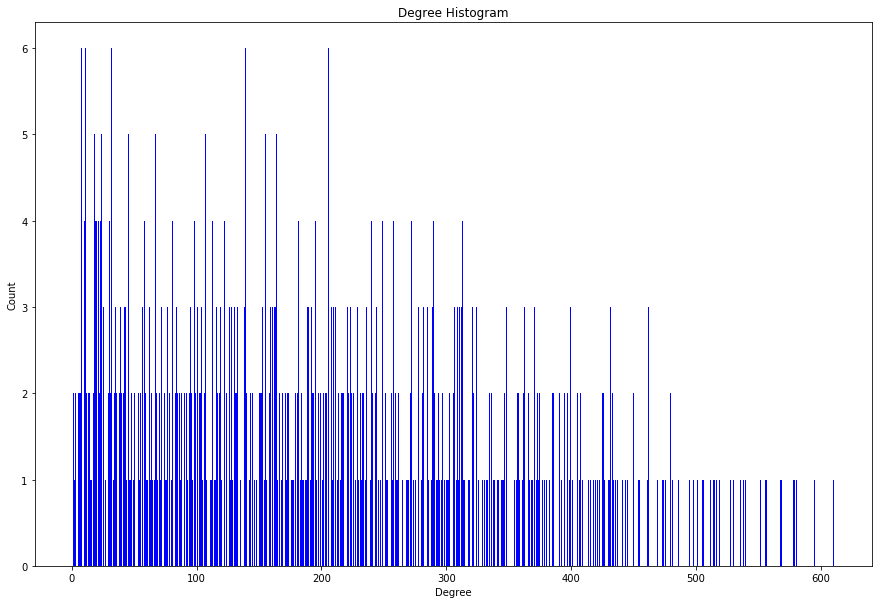

In [433]:
import collections
G=projection
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.subplots(figsize=(15,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# # draw graph in inset
# plt.axes([0.4, 0.4, 0.5, 0.5])
# Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
# pos = nx.spring_layout(G)
# plt.axis('off')
# nx.draw_networkx_nodes(G, pos, node_size=20)
# nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [9]:
history=pd.read_csv('../Data_userprofile/train_test/train.csv')

In [10]:
history.head()

,user,count,track_id,song_id,artist,song_y,duration,loudness,tempo,song_hotness,artist_hotness,key_confidence,mode_confidence,release_year,artist_id,artist_tag,predict,track_label,user_label,demeaned_count
0,93b58bd2feab229d599a119c6e3ede2d5e46829d,1,TRAQVTO128F14696A6,SONJBQX12A6D4F8382,Daft Punk,Da Funk,329.53424,-5.019,111.201,0.862255,1.021256,0.055,0.419,1995,b'ARF8HTQ1187B9AE693',[b'french' b'electronic' b'wp musicians' b'eur...,23,1670,71627,-0.666667
1,c30ef473f8260e912a68fdf974ef021d3ab354d5,7,TRAURYF128F147805D,SOIZLKI12A6D4F7B61,Muse,Supermassive Black Hole (Album Version),209.34485,-3.313,120.010,0.760348,0.750427,0.034,0.503,0,b'ARR3ONV1187B9A2F59',[],68,2035,94636,-3.000000
2,558e6f49f9455e5b51e67d7935a5e340c50c8625,3,TRANCOS128F4267DFB,SOJSGWO12AF72A2C49,Mando Diao,All My Senses,251.03628,-5.403,119.346,0.645983,0.486825,0.312,0.457,2004,b'ARR6MOS1187B994C51',[b'su\xc3\xa9dois' b'garage rock' b'swedish' b...,2,1304,41473,1.769231
3,269c71b2e37e7988ec005da553479f16194a1435,2,TRADYQK128F42A762A,SORJVDO12AF72A1970,Muse,Stockholm Syndrome,296.95955,-4.854,128.134,0.776351,0.750427,0.476,0.445,0,b'ARR3ONV1187B9A2F59',[],9,410,18697,0.500000
4,3fa78fdd6924662970f5141a90afbf55cb25883d,1,TRAAKDG128F42A0ECB,SOEHWGF12A6D4F8B2B,Shakira Featuring Wyclef Jean,Hips Don't Lie (featuring Wyclef Jean),217.36444,-5.152,100.023,0.737385,0.682263,0.805,0.688,0,b'AR6PJ8R1187FB5AD70',[b'colombian' b'classic pop and rock' b'espa\x...,29,51,30841,-0.200000


In [12]:
test_cluster_batch = pd.read_csv('../Data_userprofile/train_test/test_cluster_batch.csv')

In [13]:
test_mini = test_cluster_batch[test_cluster_batch['CF']!=-99]
test_mini.head()

,user,count,track_id,song_id,artist,song_y,duration,loudness,tempo,song_hotness,...,artist_tag,predict,CF,dummy,like,CF_raw,SONG_AVG,SONG_Q,track_label,user_label
0,82ef16cb5e45c1afe71979afcc6dbae8fdd36aeb,8,TRBDQUF128F42AE54C,SOBBFWL12A8C140087,Daler Mehndi;Chitra,Rang De Basanti,363.80689,-7.403,105.026,0.363686,...,[b'singer' b'dancer' b'indian'],49,2.0,0,2,9.616318,8.628472,5.0,2920,63564
2,a3d5597a793f2fad64f6468729711c36bb49c594,9,TRALSXX128F92F94B0,SOBSEGK12A58A7BEBF,Sex Pistols,Seventeen,129.93261,-6.458,129.722,0.704853,...,[b'british' b'punk rock' b'uk' b'london' b'eng...,62,1.0,0,2,3.353521,3.427536,1.0,1179,79550
4,b6b71d901553d790698f562e7dfd211a4724f131,14,TRAURYF128F147805D,SOIZLKI12A6D4F7B61,Muse,Supermassive Black Hole (Album Version),209.34485,-3.313,120.010,0.760348,...,[],68,1.0,0,2,3.879612,4.144224,2.0,2035,88685
5,392a322c1d6788bc7e0ab2ad9e486a6ff5520385,17,TRBALRR128F429625D,SOLSJHM12A8C139B46,Britney Spears,Can't Make You Love Me,196.80608,-3.693,107.969,0.839984,...,[b'pop' b'american' b'urban pop' b'dance' b'po...,25,1.0,0,2,3.000000,3.792100,1.0,2616,27724
6,4ca1ad89fabf7c775216702d2638f5c26dc4bd34,2,TRBCWOW128F1467692,SOBPHQK12AF72A6AFF,Long Beach Dub Allstars,Like A Dog,213.62893,-6.969,93.317,NaN,...,[],29,1.0,0,0,3.858094,3.707865,1.0,2846,37083


In [137]:
def get_neighbours_score(graph,center_node,step):
    node_score={}
    frac=1/step
    full_path=nx.single_source_shortest_path(graph, source=center_node, cutoff=step)
    for node, cutoff in full_path.items():
        for i in range(len(full_path[node])-1):
            if node != center_node:
                score=0
                score=score+frac*projection[adjacent_nodes_path[node][i+1]][adjacent_nodes_path[node][i]]['weight']
                if node not in node_score.keys():
                    node_score[node]=score
    return node_score

In [138]:
get_neighbours_score(projection,'TRAWZJW128F42297EE',1)

{'TRASVOH12903CCDC0B': 1.0,
 'TRAPTOE128F4272000': 2.0,
 'TRAWPNC128F92EAA90': 2.0,
 'TRAAMES128F42AF068': 1.0,
 'TRASDOI128F1480E28': 1.0,
 'TRAFJVH128F42BC25E': 1.0,
 'TRBDHKL128F426BE45': 1.0,
 'TRBGWWM12903CCE627': 1.0,
 'TRAGYMA128EF34B55E': 3.0,
 'TRBFXMJ12903CB50F6': 1.0,
 'TRAICHS128E0785545': 1.0,
 'TRAADLN128F14832E9': 1.0,
 'TRAWBOE128F92F2F46': 1.0,
 'TRAVSVL128F14B12BE': 1.0,
 'TRAYWLI128F9300223': 1.0,
 'TRATKVY128EF35F97A': 1.0,
 'TRBGSAQ128F1470B41': 1.0,
 'TRBALRR128F429625D': 1.0,
 'TRAZCMR128F1462B51': 1.0,
 'TRBFEID128F42368AC': 1.0,
 'TRAFZRL128F428E465': 1.0,
 'TRAQJMP128F92E3821': 1.0}

In [139]:
history.head()

,user,count,track_id,song_id,artist,song_y,duration,loudness,tempo,song_hotness,artist_hotness,key_confidence,mode_confidence,release_year,artist_id,artist_tag,predict,track_label,user_label,demeaned_count
0,93b58bd2feab229d599a119c6e3ede2d5e46829d,1,TRAQVTO128F14696A6,SONJBQX12A6D4F8382,Daft Punk,Da Funk,329.53424,-5.019,111.201,0.862255,1.021256,0.055,0.419,1995,b'ARF8HTQ1187B9AE693',[b'french' b'electronic' b'wp musicians' b'eur...,23,1670,71627,-0.666667
1,c30ef473f8260e912a68fdf974ef021d3ab354d5,7,TRAURYF128F147805D,SOIZLKI12A6D4F7B61,Muse,Supermassive Black Hole (Album Version),209.34485,-3.313,120.010,0.760348,0.750427,0.034,0.503,0,b'ARR3ONV1187B9A2F59',[],68,2035,94636,-3.000000
2,558e6f49f9455e5b51e67d7935a5e340c50c8625,3,TRANCOS128F4267DFB,SOJSGWO12AF72A2C49,Mando Diao,All My Senses,251.03628,-5.403,119.346,0.645983,0.486825,0.312,0.457,2004,b'ARR6MOS1187B994C51',[b'su\xc3\xa9dois' b'garage rock' b'swedish' b...,2,1304,41473,1.769231
3,269c71b2e37e7988ec005da553479f16194a1435,2,TRADYQK128F42A762A,SORJVDO12AF72A1970,Muse,Stockholm Syndrome,296.95955,-4.854,128.134,0.776351,0.750427,0.476,0.445,0,b'ARR3ONV1187B9A2F59',[],9,410,18697,0.500000
4,3fa78fdd6924662970f5141a90afbf55cb25883d,1,TRAAKDG128F42A0ECB,SOEHWGF12A6D4F8B2B,Shakira Featuring Wyclef Jean,Hips Don't Lie (featuring Wyclef Jean),217.36444,-5.152,100.023,0.737385,0.682263,0.805,0.688,0,b'AR6PJ8R1187FB5AD70',[b'colombian' b'classic pop and rock' b'espa\x...,29,51,30841,-0.200000


In [314]:
import math
import operator
def get_user_songs(df_history,user_id,graph,param,recommend_num):
    df_all_tracks = df_history[df_history['user'] == user_id].track_id.reset_index()
    history_list = df_all_tracks['track_id'].tolist()
    node_score={}
    node_score_sorted={}
    for i in history_list:
        if i in graph.nodes:
            path_len_two=nx.single_source_shortest_path(graph, source=i, cutoff=2)
            for node, cutoff in path_len_two.items():
                if node != i:
                    if len(path_len_two[node])==2:
                        score=0
                        score=param*projection[path_len_two[node][1]][path_len_two[node][0]]['weight']
                        if node not in node_score.keys():
                            node_score[node]=score
                        else:
                            node_score[node]= math.log(node_score[node]+score+1)
                    elif len(path_len_two[node])==3:
                        score=0
                        score=param*param*(projection[path_len_two[node][2]][path_len_two[node][1]]['weight'] + projection[path_len_two[node][1]][path_len_two[node][0]]['weight'])
                        if node not in node_score.keys():
                            node_score[node]=score 
                        else:
                            node_score[node]= math.log(node_score[node]+score+1)
    node_score_sorted=sorted(node_score.items(), key=operator.itemgetter(1),reverse=True)
    final_recommend=node_score_sorted[:recommend_num]
    return final_recommend

In [344]:
def test_hit(song_list,recommend_list):
    for song in song_list:
        for i in range(len(recommend_list)):
            if song in recommend_list[i][0]:
                return True
    return False

In [316]:
def calculate_accuracy(df_test,df_history,graph,param,recommend_num):
    total_size=len(df_test.index)
    test_user_list=df_test['user'].tolist()
    hit_count=0
    for user in test_user_list:
        song_list = df_test[df_test['user'] == user].track_id.reset_index()['track_id'].tolist()       
        recommend_list= get_user_songs(df_history,user,graph,param,recommend_num)
        if test_hit(song_list,recommend_list)==True:
            hit_count=hit_count+1
    accuracy=hit_count/total_size
    return accuracy        

In [317]:
calculate_accuracy(test_mini,history,projection,0.01,10)

0.3637400228050171

In [318]:
calculate_accuracy(test_mini,history,projection,0.01,50)

0.6237172177879133

In [319]:
calculate_accuracy(test_mini,history,projection,0.01,100)

0.7194982896237172

In [376]:
def hit_rank(song_list,recommend_list):
    all_score=[]
    min_rank=0
    for song in song_list:
        for i in range(len(recommend_list)):
            if song in recommend_list[i][0]:
                all_score.append(i)
    min_rank=min(all_score)
    return min_rank

In [377]:
def calculate_rank(df_test,df_history,graph,param,recommend_num):  
    test_user_list=df_test['user'].tolist()
    rank_cnt=0
    rank=0
    for user in test_user_list:
        song_list = df_test[df_test['user'] == user].track_id.reset_index()['track_id'].tolist()       
        recommend_list= get_user_songs(df_history,user,graph,param,recommend_num)
        if test_hit(song_list,recommend_list)==True:
            rank=rank+hit_rank(song_list,recommend_list)
            rank_cnt=rank_cnt+1
    avg_rank=rank/rank_cnt
    return avg_rank

In [378]:
calculate_rank(test_mini,history,projection,0.01,10)

2.93730407523511

In [379]:
calculate_rank(test_mini,history,projection,0.01,50)

11.915904936014625

In [380]:
calculate_rank(test_mini,history,projection,0.01,100)

19.91283676703645

In [388]:
neighbor_number_list=[10,25,50,75,100]
accuracy_list=[]
for i in neighbor_number_list:
    accuracy_list.append(calculate_accuracy(test_mini,history,projection,0.01,i))

In [387]:
neighbor_number_list=[10,25,50,75,100]
accuracy_list_1=[]
for i in neighbor_number_list:
    accuracy_list_1.append(calculate_accuracy(test_mini,history,projection,0.1,i))

In [389]:
neighbor_number_list=[10,25,50,75,100]
accuracy_list_2=[]
for i in neighbor_number_list:
    accuracy_list_2.append(calculate_accuracy(test_mini,history,projection,0.3,i))

In [390]:
neighbor_number_list=[10,25,50,75,100]
accuracy_list_3=[]
for i in neighbor_number_list:
    accuracy_list_3.append(calculate_accuracy(test_mini,history,projection,0.5,i))

In [391]:
neighbor_number_list=[10,25,50,75,100]
accuracy_list_4=[]
for i in neighbor_number_list:
    accuracy_list_4.append(calculate_accuracy(test_mini,history,projection,0.7,i))

In [392]:
accuracy_list

[0.3637400228050171,
 0.508551881413911,
 0.6237172177879133,
 0.6761687571265679,
 0.7194982896237172]

In [393]:
accuracy_list_1

[0.33979475484606614,
 0.4925883694412771,
 0.5929304446978335,
 0.6442417331812998,
 0.69327251995439]

In [394]:
accuracy_list_2

[0.3181299885974915,
 0.4583808437856328,
 0.5359179019384265,
 0.5895096921322691,
 0.6419612314709237]

In [395]:
accuracy_list_3

[0.2896237172177879,
 0.41961231470923605,
 0.5028506271379704,
 0.56442417331813,
 0.6009122006841505]

In [396]:
accuracy_list_4

[0.24971493728620298,
 0.3671607753705815,
 0.45610034207525657,
 0.540478905359179,
 0.5826681870011402]

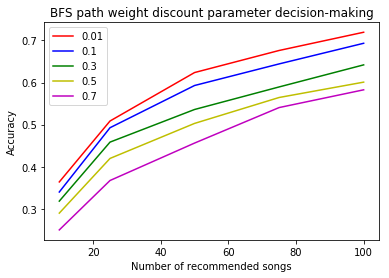

In [406]:
plt.plot(neighbor_number_list, accuracy_list, 'r',neighbor_number_list , accuracy_list_1, 'b', neighbor_number_list, accuracy_list_2, 'g', neighbor_number_list, accuracy_list_3, 'y', neighbor_number_list, accuracy_list_4, 'm')
plt.legend([0.01,0.1,0.3,0.5,0.7])
plt.xlabel('Number of recommended songs')
plt.ylabel('Accuracy')
plt.title("BFS path weight discount parameter decision-making")
plt.show()

In [407]:
neighbor_number_list=[10,25,50,75,100]
rank_list=[]
for i in neighbor_number_list:
    rank_list.append(calculate_rank(test_mini,history,projection,0.01,i))

In [408]:
rank_list

[2.93730407523511,
 6.475336322869955,
 11.915904936014625,
 15.72681281618887,
 19.91283676703645]

In [409]:
proportion_list=[]
for i in range(len(rank_list)):
    proportion_list.append(rank_list[i]/neighbor_number_list[i])
proportion_list

[0.293730407523511,
 0.2590134529147982,
 0.2383180987202925,
 0.20969083754918494,
 0.1991283676703645]

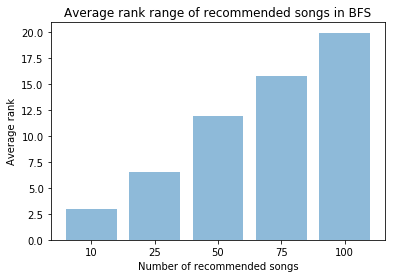

In [421]:
y_pos = np.arange(len(neighbor_number_list))
plt.bar(y_pos,rank_list, alpha=0.5)
plt.xticks(y_pos, neighbor_number_list)
plt.xlabel('Number of recommended songs')
plt.ylabel('Average rank')
plt.title("Average rank range of recommended songs in BFS")
plt.show()

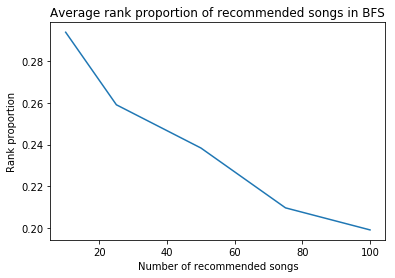

In [412]:
plt.plot(neighbor_number_list,proportion_list)
plt.xlabel('Number of recommended songs')
plt.ylabel('Rank proportion')
plt.title("Average rank proportion of recommended songs in BFS")
plt.show()

In [281]:
# len(test_mini.index)

In [381]:
# song=test_mini[test_mini['user'] == '392a322c1d6788bc7e0ab2ad9e486a6ff5520385'].track_id.reset_index()['track_id'].tolist()
# song

In [279]:
# for j in song:
#     print(j)
#     for i in range(len(all_recommend)):
#         if j in all_recommend[i][0]:
#             print(all_recommend[i][1])

In [278]:
# for i in all_recommend:
#     if song[0] in all_recommend:
#         print(1)

In [277]:
# for i in range(len(all_recommend)):
#     if song[0] in all_recommend[i][0]:
#         print(all_recommend[i][1])

In [382]:
# all_recommend=get_user_songs(history,'392a322c1d6788bc7e0ab2ad9e486a6ff5520385',projection,0.01,10)
# all_recommend